**1. Given two 1-d arrays of simulated values and observed values, Write a Pyhton function to calculate the mean error, coefficient of determination and nash coefficient. Not allowed to use loops.

In [64]:
import numpy as np

obsVals = np.random.rand(1,10)*100
simVals = np.random.rand(1,10)*100


def arraysMeanError(obsVals, simVals):
    """ 'arraysMeanError' function calculates mean error between two arrays"""
    
    # convert lists to arrays
    obsVals = np.asarray(obsVals)
    simVals = np.asarray(simVals)
   
    return np.nanmean(simVals-obsVals)

def coeffDetermination(obsVals, simVals):
    """ 'coeffDetermination' function calculates coefficient of determination
    for regression between two numbers in arrays"""
    
    # convert lists to arrays
    obsVals = np.asarray(obsVals)
    simVals = np.asarray(simVals)
    numObs = obsVals.size
    # r^2 value (i.e. coefficient of determination)
    return (numObs * np.nansum(obsVals * simVals) - np.nansum(obsVals) * np.nansum(simVals)) ** 2 / \
            ((numObs * np.nansum(obsVals ** 2) - np.nansum(obsVals) ** 2) * (numObs * np.nansum(simVals ** 2) - np.nansum(simVals) ** 2))

def nashCoefficient(obsVals, simVals):
    """ function calculates Nash coefficient """   
    obsVals = np.array(obsVals)
    simVals = np.array(simVals)
    obs_mean = np.nanmean(obsVals)
    return 1 - np.nansum((simVals - obsVals) ** 2) / np.nansum((simVals - obs_mean) ** 2)

np.set_printoptions(precision=2)
print("The simulated value =", simVals)
print("The observed value =",obsVals)
print(f'The mean error = {arraysMeanError(obsVals, simVals):.2f}')
print(f'The nash coefficient = {nashCoefficient(obsVals,simVals):.4f}')
print(f'The coefficient of determination = {coeffDetermination(obsVals,simVals):.4f}')

The simulated value = [[ 9.33 74.9  31.89  6.32 72.23 89.79 67.52 87.88 67.23 41.57]]
The observed value = [[29.79 89.71 24.1  70.02 43.92 96.98 43.76 24.18 84.61 68.79]]
The mean error = -2.72
The nash coefficient = -0.3210
The coefficient of determination = 0.0762


**2. Given x and y, write a Python function to perform linear regression which returns a, c and sum of square errors where ax + c = y.


    def linear_regression(x, y):

        return a, c, ssqe

In [30]:
import numpy as np
def linearRegression(x,y):
    
    x = np.array(x)
    y = np.array(y)
    numObs = x.size
 
    # slope
    a = (numObs*np.sum(x*y)-np.sum(x)*np.sum(y))/(numObs*np.sum(x**2)-np.sum(x)**2)
    
    # intercept
    c = (np.sum(y)*np.sum(x**2)-np.sum(x)*np.sum(x*y))/(numObs*np.sum(x**2)-np.sum(x)**2)
    
    # calculate predicted 'y' from linear equaiton for which we just found the slope & intercept (i.e. y=a*x+c)
    # then find the error by getting the difference between the predicted value and the actual value at that 'x'
    sqError = np.sum(((a*x+c)-y)**2)
       
    return a, c, sqError

#x = [1,2,3,4,5,6,7,8,9,10]
#y = [0,3,4,4,6,6,8,9,9,11]

x = np.random.rand(1,10)*100
y = np.random.rand(1,10)*100

info = linearRegression(x,y)

print("Generated X value: ")
print(x)
print("Generated Y numbers:")
print(y)
print("  ")
print("  ")
print("=============Soluntion================ ")
print(f'slope= {info[0]:.3f}')
print(f'intercept= {info[1]:.3f}')
print(f'sum of square error= {info[2]:.2f}')

Generated X value: 
[[96.46985196 87.57832733 82.96445868 21.85511375 96.99230548 13.07532782
  16.0729662  55.6187092  50.69298363 80.58538671]]
Generated Y numbers:
[[23.95739458 85.61753922 37.67015044 98.03500069 92.18280164 87.72122882
  83.00051966 44.96714477 11.41593022 60.64100429]]
  
  
=============Soluntion================ 
slope= -0.313
intercept= 81.383
sum of square error= 7764.99


**3. Eestimate the mean precipitation on different land use types.

landuse = np.random.randint(1, 5, [5, 5])
precip  = np.random.random([5, 5])

print('landuse\n', landuse)
print('precip \n', precip)

In [41]:
landuse = np.random.randint(1, 5, [5, 5])
precip  = np.random.random([5, 5])

def meanPrecip(landuse, precip):
    
    landUseDictionary = {}
    
    for ii in np.unique(landuse):
        landUseDictionary[ii] = precip[landuse == ii].mean()
        
    return landUseDictionary

print('landuse\n', landuse)
print('precip \n', precip)
print("  ")
print("The mean precipitation on land 1,2,3,4.")
print(meanPrecip(landuse, precip))

landuse
 [[1 1 2 3 2]
 [2 2 3 4 2]
 [1 2 2 3 3]
 [2 3 3 4 1]
 [1 3 1 2 2]]
precip 
 [[0.473321   0.10179438 0.93992277 0.4312861  0.00999824]
 [0.86729161 0.24740058 0.75298454 0.74655215 0.83624566]
 [0.7118826  0.0835172  0.98199478 0.15844121 0.29466051]
 [0.62917781 0.01293452 0.58559527 0.92437493 0.7219941 ]
 [0.49894035 0.00487502 0.35521049 0.58363714 0.36950886]]
  
The mean precipitation on land 1,2,3,4.
{1: 0.4771904861238539, 2: 0.554869464994352, 3: 0.32011102450957385, 4: 0.835463540734654}


**4. We have two array. The first array is the distribution of irrigated land.
The second array is the precipitation.
landuse = np.random.randint(0, 1, [6, 6])
precip  = np.random.random([6, 6])

print('landuse\n', landuse)
print('precip \n', precip)
A. Create a function to create the buffer zones of varied distances to the irrigated land.
B. Calculate the mean precipitation in the buffer zones of different distance to the irrigated land.

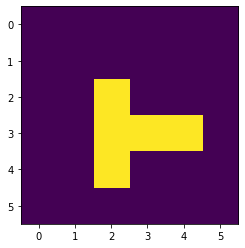

In [42]:
import numpy as np
import matplotlib.pyplot as plt

landuse = [
    [0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [0,0,1,0,0,0],
    [0,0,1,1,1,0],
    [0,0,1,0,0,0],
    [0,0,0,0,0,0],
    ]

precip  = np.random.random([6, 6])
plt.imshow(landuse)

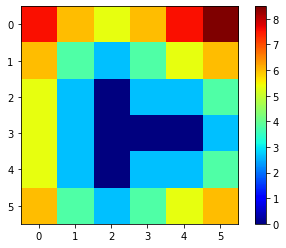

In [45]:
import numpy as np
import matplotlib.pyplot as plt

landuse = [
    [0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [0,0,1,0,0,0],
    [0,0,1,1,1,0],
    [0,0,1,0,0,0],
    [0,0,0,0,0,0],
    ]

precip  = np.random.random([6, 6])
plt.imshow(landuse)

# define an array with distance to the center

distX = np.arange(13).reshape([1,13])
distY = np.arange(13).reshape([13,1])
distance = ((distX-6)**2+(distY-6)**2)**0.5
plt.imshow(distance, cmap='jet'); plt.colorbar()

def createBuffer(landuse, distance=distance):
    
    buffer = np.full_like(landuse, 1e9)
    n,m = buffer.shape
    index = np.nonzero(landuse)
    for i,j in np.array(index).T:
        distBuffer = distance[(6-i):(6-i+n), (6-j):(6-j+m)]
        buffer = np.where(distBuffer < buffer, distBuffer, buffer)
    return buffer

buffer = createBuffer(landuse)
plt.imshow(buffer, cmap='jet');

# from problem #3
def meanPrecip(landuse, precip):
    
    landUseDictionary = {}
    
    for ii in np.unique(landuse):
        landUseDictionary[ii] = precip[landuse == ii].mean()
    
    return landUseDictionary


In [55]:
print("The mean precipitation in the buffer zones of different distance to the irrigated land.")
print("")
from pprint import pprint
pprint(meanPrecip(buffer, precip))
#print(meanPrecip(buffer, precip))

The mean precipitation in the buffer zones of different distance to the irrigated land.

{0.0: 0.6831187556110593,
 1.0: 0.35866687499823485,
 1.4142135623730951: 0.5194283128534763,
 2.0: 0.3445058207176655,
 2.23606797749979: 0.5009065663798871,
 2.8284271247461903: 0.5556950797364587,
 3.1622776601683795: 0.5070115446689977}


5. Write a Python function to find the nearest point of a list of given points.
You are not allowed to use any type of loops.
e. g. points = [(3, 4), (1, 2), (7, 8), (9, 4), (6, 5), (8, 7), (4, 7)]
Hint: using numpy to create a N x N array which contain the distances between each ith an jth point pair; where N is the numer of points.


In [63]:
points = [(3, 4), (1, 2), (7, 8), (9, 4), (6, 5), (8, 7), (4, 7)]
points = np.array(points)

# use method from the solution
distances = ((points.reshape(7, 1, 2) - points.reshape(1, 7, 2)) ** 2).sum(axis=2)
distances[np.arange(7), np.arange(7)] = 1e9

closestPoints = np.argmin(distances, axis=0)

oneLine = np.sum((points[None,:] - points[:,None])**2, -1)
oneLine[np.arange(7), np.arange(7)] = 1e9

closestPt = np.argmin(oneLine, axis=0)
print('The nearest point of a list of given point =>',closestPt)

The nearest point of a list of given point => [1 0 5 4 5 2 4]
